<h1 align=center><font size = 8>Situación Covid-19 en Galicia</font></h1>

El propósito de este notebook es capturar de la <a href="https://coronavirus.sergas.gal/datos/#/gl-ES/undefined">web del Sergas</a> los datos actualizados de la situación de Galicia frente al Covid-19, y posteriormente realizar algunos análisis básicos, guardando los resultados en directorios.

Para los cálculos basados en el número de habitantes se emplea un fichero csv obteniendo mediante otro notebook, llamado _Población Areas_ y también disponible en el repositorio de GitHub. Se debe de tener en cuenta que en este análisis se trabaja con áreas sanitarias y no con ayuntamientos. Pese a que todos los nombres de las áreas sanitarias coinciden también con nombres de ayuntamientos, en ellas se encuentran englobadas otras comarcas y ayuntamientos limítrofes y próximas.

In [4]:
from classes.covid19galicia import covid19galicia
import pandas as pd

# 1. Importación de datos

Creamos la clase que maneja los datos de la web del Sergas e importamos solamente aquellos que son necesarios para las futuras gráficas.

In [5]:
galicia = covid19galicia()
casos_activos = galicia.getCifrasTotais()
infectados_fecha = galicia.getInfeccionesPorFecha()
camas = galicia.getOcupacionCamas()
fallecidos = galicia.getActivosCuradosFallecidos()
inc14 = galicia.getIncidenciaConcello()

Ultima actualización: 2021-06-04


Podemos visualizar los datos del último día:

In [6]:
total = galicia.getCifrasTotais()
print('En las últimas 24h hubo {} casos en Galicia'.format(total['Casos_Confirmados_PDIA_Ultimas24h'].sum()))
total

En las últimas 24h hubo 101 casos en Galicia


,Fecha,Area_Sanitaria,Casos_Totais,Casos_Confirmados_PDIA_Ultimas24h,Pacientes_Sin_Alta,Pacientes_Con_Alta,Camas_Ocupadas_HOS,Camas_Ocupadas_UCI,Probas_Realizadas_PCR,Probas_Realizadas_Non_PDIA,Exitus,Probas_Antixenos_Realizadas
0,2021-06-04,A Coruña,30470,25,342,29549,13,2,507171,150028,593,180311
1,2021-06-04,Ferrol,8638,0,108,8307,6,1,145445,60897,217,15112
2,2021-06-04,Lugo,12946,18,245,12480,8,2,248944,134062,216,39556
3,2021-06-04,Ourense,15762,9,159,15186,7,0,257926,130158,418,70047
4,2021-06-04,Pontevedra,14316,7,222,13913,13,2,238578,91343,181,78155
5,2021-06-04,Santiago,20031,12,335,19345,16,2,363341,144045,364,93007
6,2021-06-04,Vigo,25137,30,534,24174,8,4,513334,266219,437,66670


# 2. Análisis

## 2.1. Casos activos - Total por área sanitaria

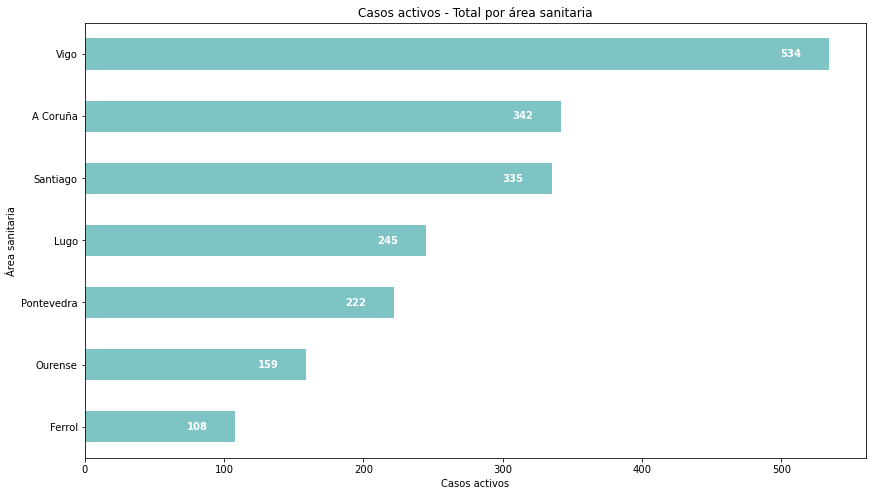

In [7]:
galicia.plotCasosActivos(casos_activos, cienmil=False)

## 2.2. Casos activos - Porcentaje por área sanitaria

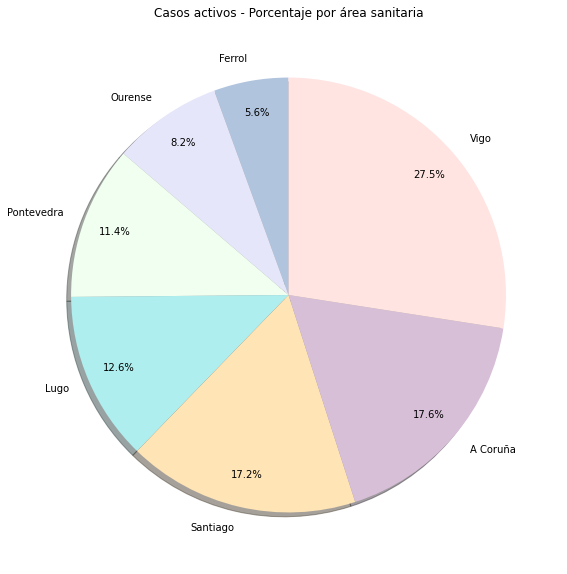

In [8]:
galicia.plotPorcentajeAreas(casos_activos)

## 2.3. Positivos

### 2.3.1. Evolución positivos acumulados últimos 7 días

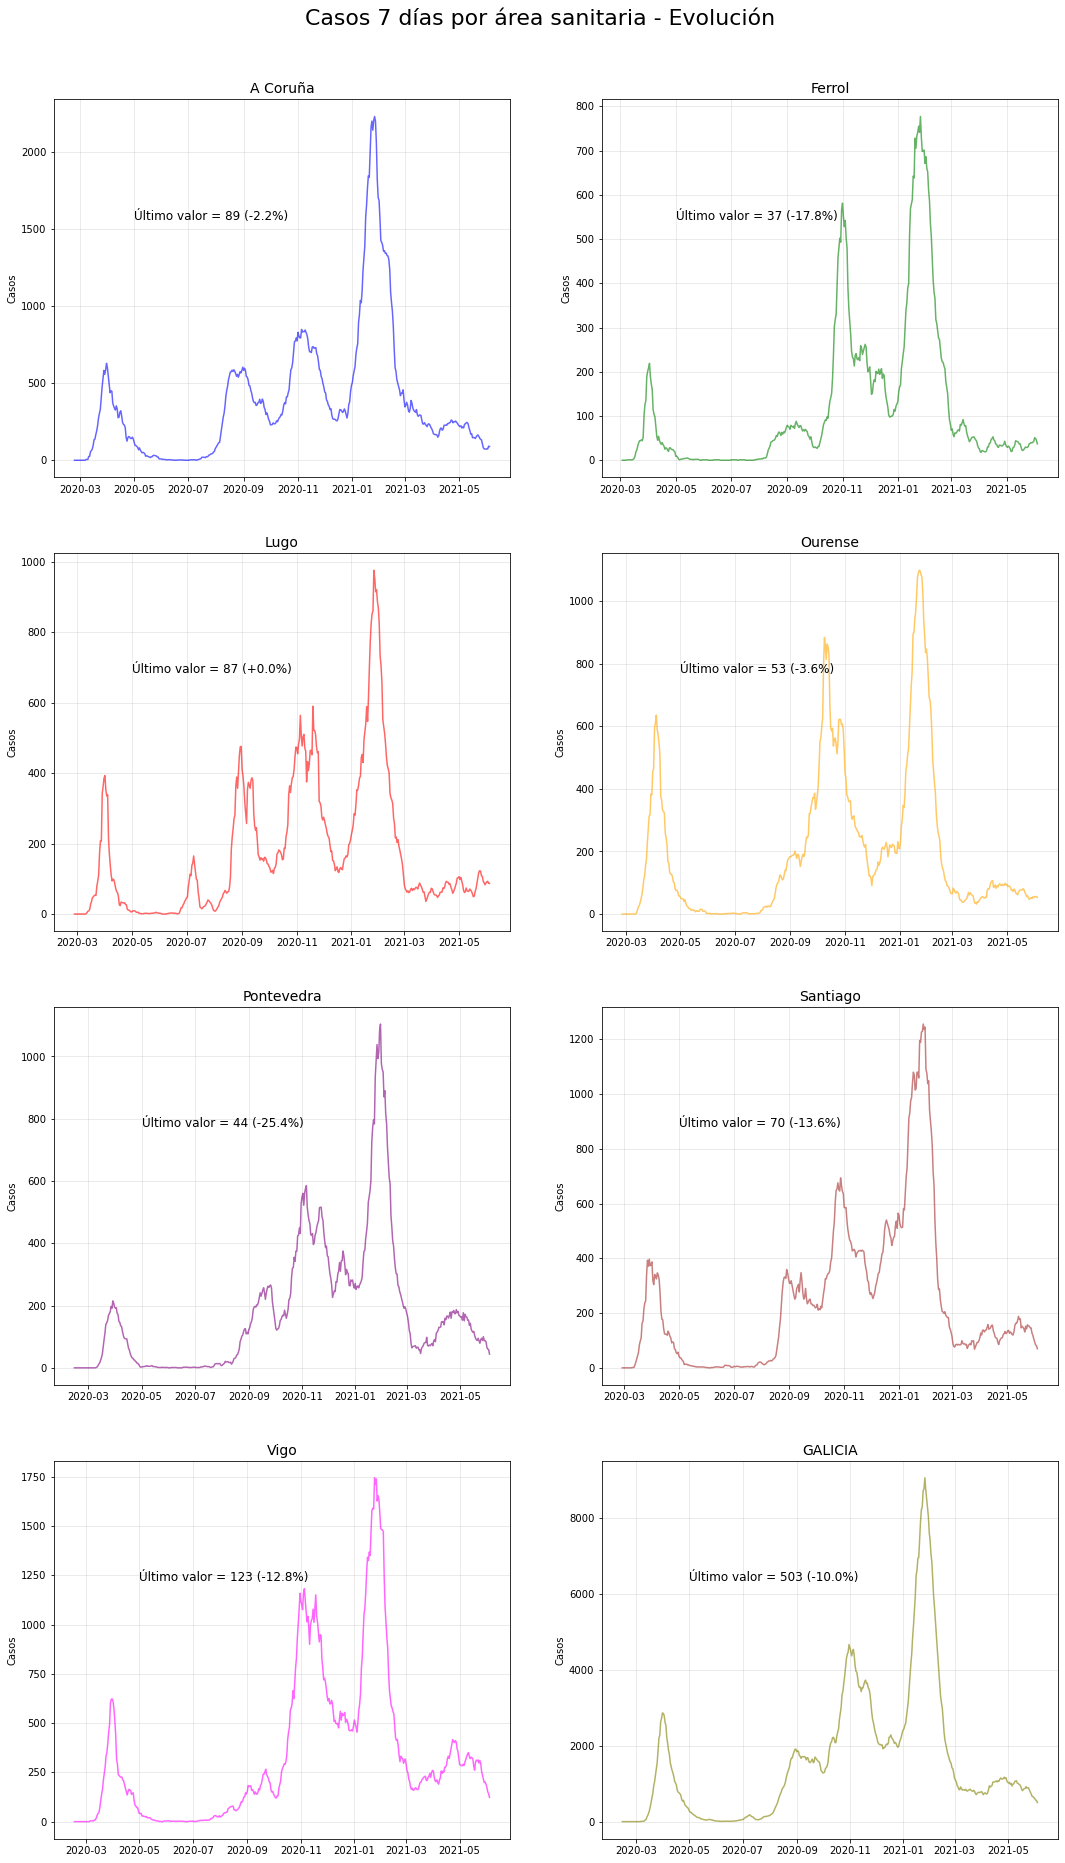

In [9]:
galicia.plotAcumulados(infectados_fecha, kind='Casos', days=7)

### 2.3.2. Comparativo positivos acumulados últimos 7 días

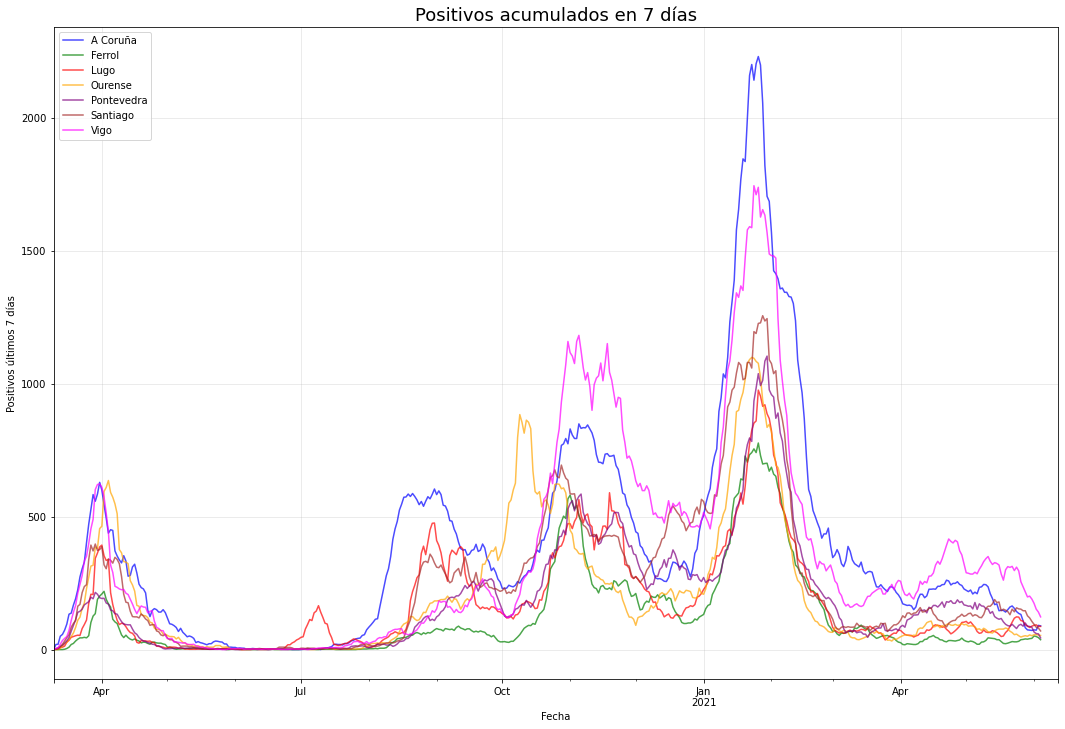

In [10]:
galicia.plotCombinado(infectados_fecha)

### 2.3.3. Principales ciudades - Incidencia 14 días / 100.000 habitantes

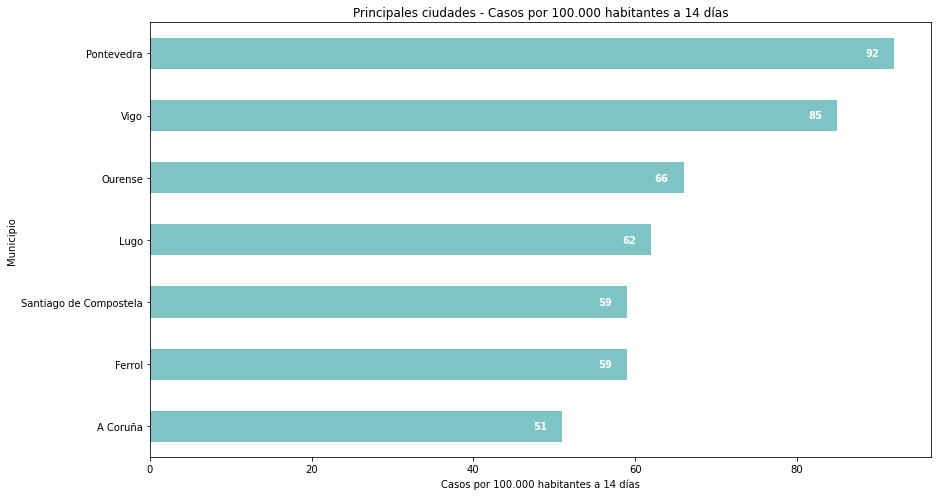

In [11]:
galicia.plotIncidenciaAcumulada(inc14, 'ciudades')

### 2.3.4. Top 10 municipios con mayor incidencia 14 días / 100.000 habitantes

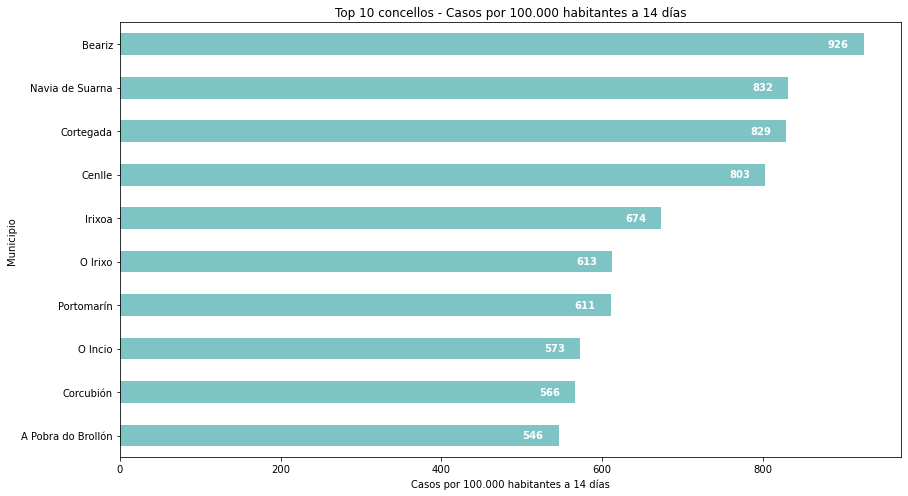

In [12]:
galicia.plotIncidenciaAcumulada(inc14, 'top10')

## 2.4. Evolución PCR acumuladas 7 días

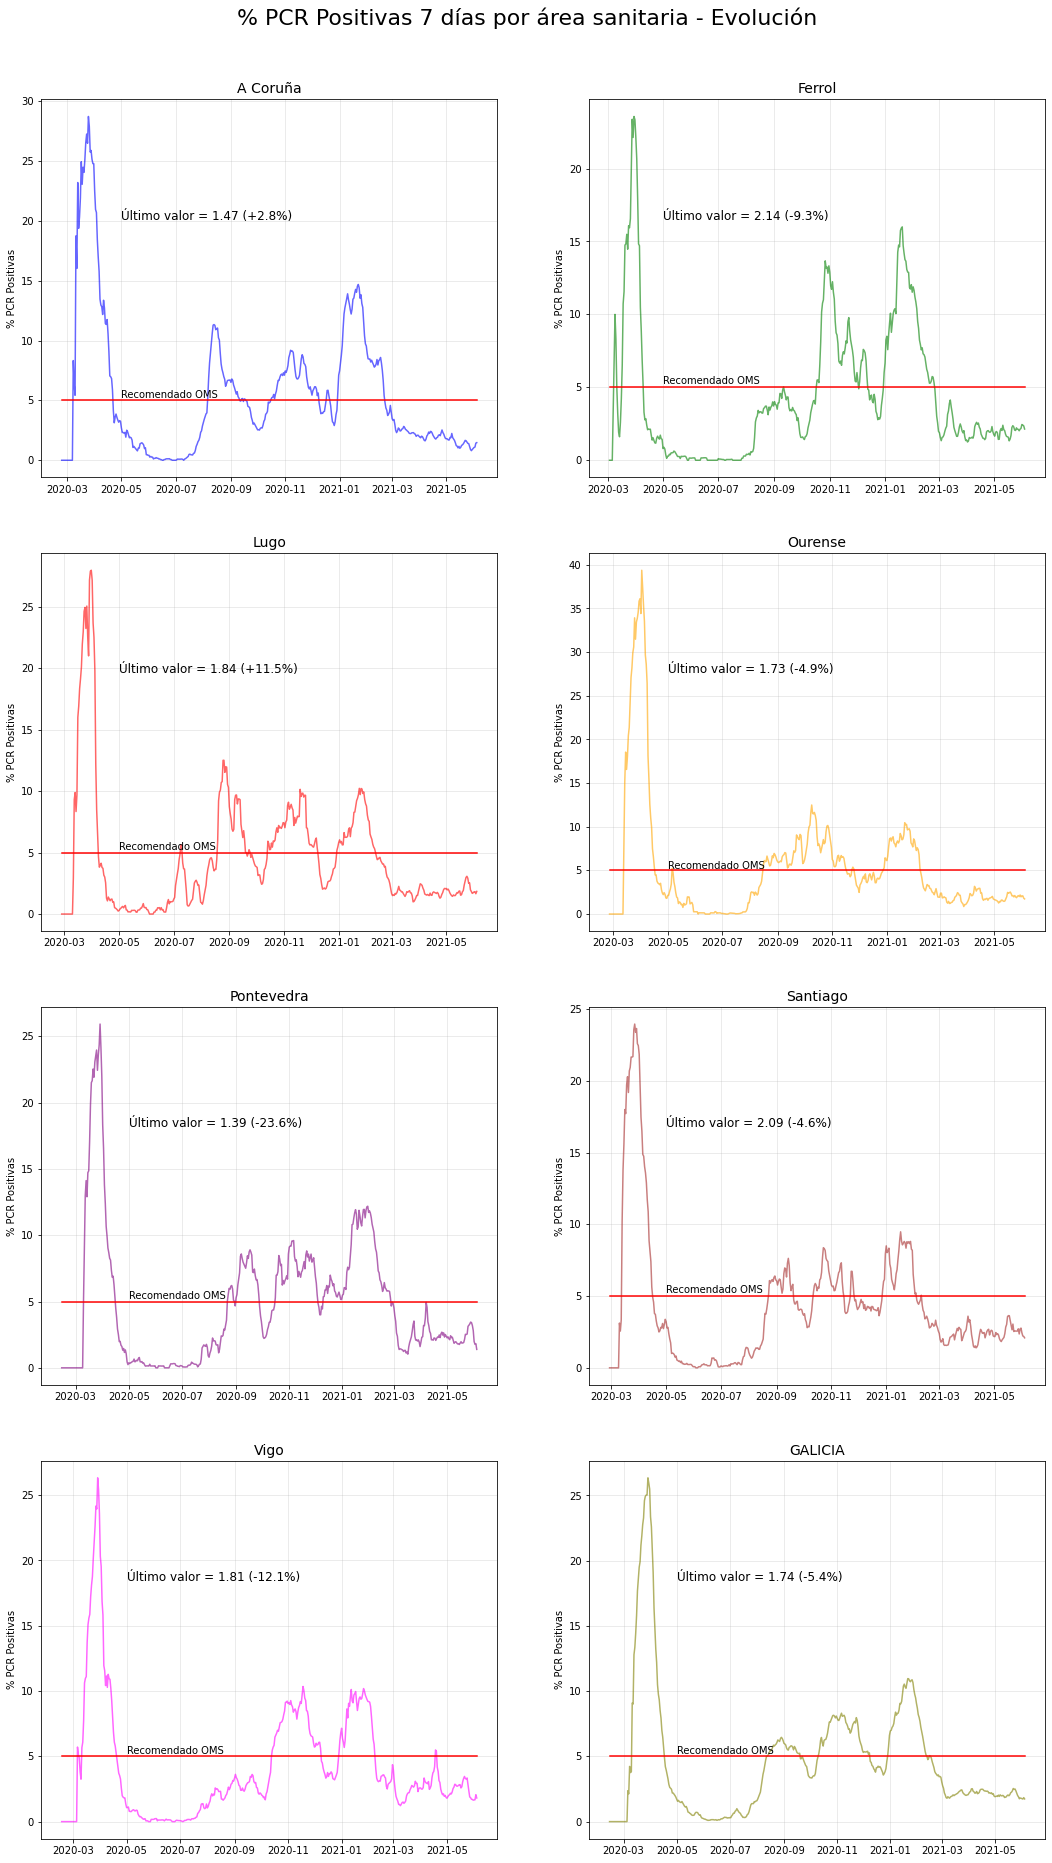

In [13]:
galicia.plotAcumulados(infectados_fecha, kind='PCR', days=7)

## 2.5. Tendencias

### 2.5.1. Clara tendencia en aumento

In [14]:
inc14 = inc14[inc14['Tendencia'].notna()]
inc14 = inc14[inc14['Casos7'] != inc14['Casos']]
inc14.sort_values('Tendencia', ascending=False)
incrementos = list(inc14['Municipio'][inc14['Tendencia'] > 10])
incrementos.sort()
print(*incrementos, sep=', ')

Ames, Cambre, Culleredo, Ferrol, Gondomar, Lousame, Marín, Monforte de Lemos, O Porriño, Ordes, Ourense, Ponteareas, Ribadeo, Soutomaior, Xove, Zas


### 2.5.2. Clara tendencia en descenso

In [15]:
descensos = list(inc14['Municipio'][inc14['Tendencia'] < -10])
descensos.sort()
print(*descensos, sep=', ')

A Baña, A Coruña, A Pobra do Brollón, A Pobra do Caramiñal, A Rúa, Allariz, Arzúa, As Neves, As Pontes de García Rodríguez, Begonte, Boiro, Boqueixón, Bueu, Cabanas, Camariñas, Castroverde, Cedeira, Coirós, Corcubión, Dodro, Dumbría, Forcarei, Frades, Guitiriz, Lobios, Melide, Mondoñedo, Mos, Muxía, Navia de Suarna, O Barco de Valdeorras, O Incio, O Irixo, Ortigueira, Pazos de Borbén, Pontevedra, Portomarín, Quiroga, Ribeira, Rodeiro, San Cibrao das Viñas, Santa Comba, Santiago de Compostela, Sanxenxo, Taboada, Trazo, Vila de Cruces, Viveiro


## 2.6. Ocupación actual de camas

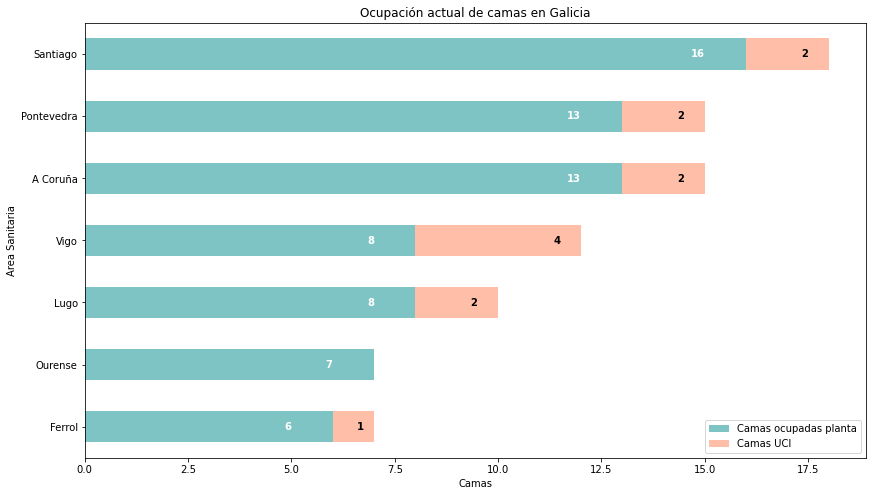

In [16]:
galicia.plotOcupacionCamas(camas)

## 2.7. Fallecidos

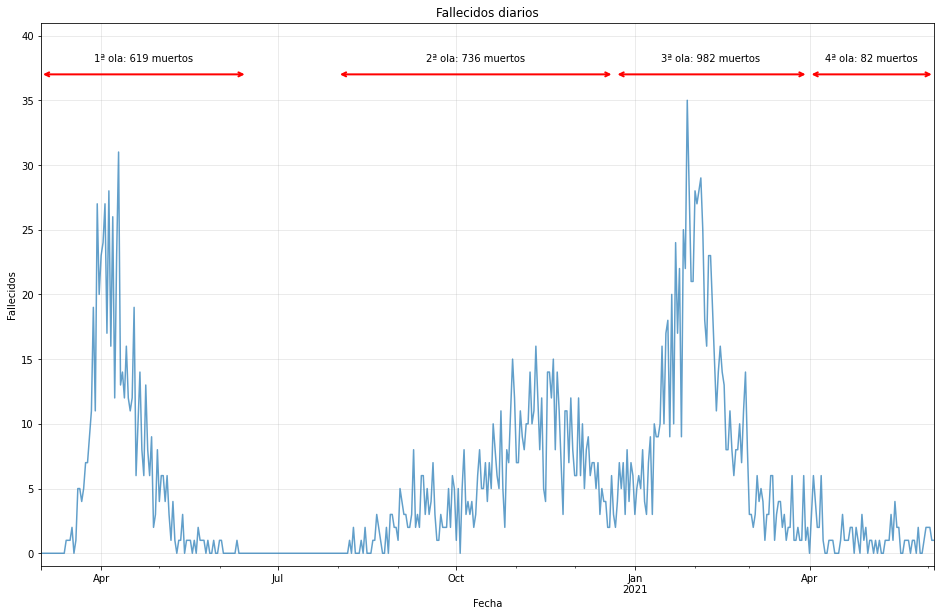

In [17]:
galicia.plotFallecidos(fallecidos)